# Dice statistical analysis

In this notebook we will perform statistical analysis based on data generated from games that include dice. More specifically, we will import two datasets and we will investigate if the roll of these dice was under fair conditions.

First, we will import all necessary packages of this notebook and the first dataset. 





In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, chi2, ks_2samp, anderson_ksamp, chisquare

data = np.loadtxt("loaded_500.txt")

## Visualising

Then, we will visualise the data in order to observe if there are any unexpected results.

[1. 2. 3. 4. 5. 6.] [70 84 86 74 88 98]


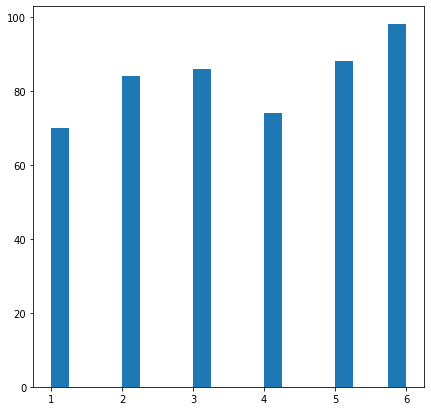

In [45]:
unique, counts = np.unique(data, return_counts=True)
print(unique, counts)
plt.figure(figsize=(7, 7));
plt.hist(data, bins=20);


We notice that the most frequent result was that of sixes (98 out of 500). This seems quite malicious. So, let's examine this dataset thoroughly.

## Reduce or quantify data

We will reduce the data since we just want the total number of rolled sixes  and the total number of rolls.


In [46]:
num_sixes = (data == 6).sum()
num_total = data.size

## Make null hypothesis

We have two outcomes when we roll a dice. We roll a six, or we roll something else. With a fair die (our null hypothesis), $p(6) = \frac{1}{6}$. As this is discrete with two options, we are looking at the *binomial* distribution.

What is the chance we roll 98 *or more* sixes with a fair die?

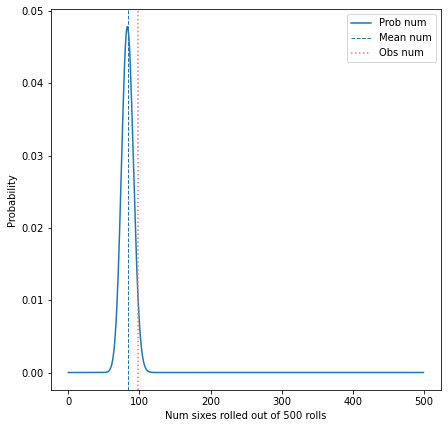

In [47]:
n = np.arange(num_total)
prob_n = binom.pmf(n, num_total, 1/6)
plt.figure(figsize=(7, 7));
plt.plot(n, prob_n, label="Prob num")
plt.axvline(num_total / 6, ls="--", lw=1, label="Mean num")
plt.axvline(num_sixes, ls=":", color="#ff7272", label="Obs num")
plt.xlabel(f"Num sixes rolled out of {num_total} rolls")
plt.ylabel("Probability")
plt.legend();

In order to calculate the chance, we have to find the area from the red dashed line through the 500. 

One option is the survival function.

Only 3.7% of the time with a fair dice you'd roll this many or more sixes.


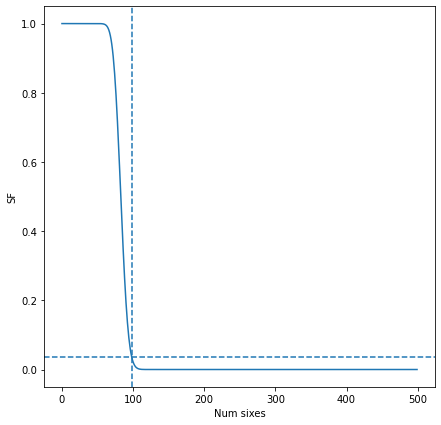

In [48]:
d = binom(num_total, 1/6)
plt.figure(figsize=(7, 7));
plt.plot(n, d.sf(n))
plt.axvline(num_sixes, ls="--")
sf = d.sf(num_sixes)
plt.axhline(sf, ls="--")
plt.xlabel("Num sixes")
plt.ylabel("SF");
print(f"Only {sf * 100:.1f}% of the time with a fair dice you'd roll this many or more sixes.")

Based on our findings, we conclude that we would roll so many sixes within 500 attemps only 3.7% of the time. Thus, it's highly unlikely that these dice were rolled under fair conditions.

## Pearson's $\chi^2$ Test

Previously, we examined only the cases when the results of the dice were sixes. However, we can make a broader investigation by testing if the distribution of rolls is consistent with a fair die.

The Pearson's $\chi^2$ test for rolling a die gives

$$ \chi^2 = \sum_{i=1}^{6} \frac{(C_i - E_i)^2}{E_i} $$

Where C denotes the number of counts and E the expected number of each result respectively.

We can convert it to a probability given the $\chi^2$ distribution, with 5 degrees of freedom (six sides - 1).

Let's calculate the $\chi^2$ of this distribution.

In [49]:
expected = data.size / 6
chi2_val = np.sum((counts - expected)**2 / expected)
print(f'Chi squared is equal to:',chi2_val)

Chi squared is equal to: 6.112


Our p-value is 0.295


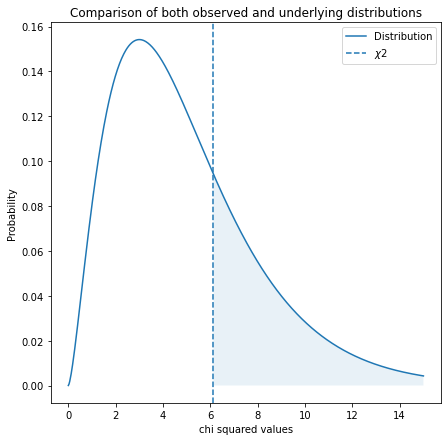

In [50]:
chi2s = np.linspace(0, 15, 500)
prob = chi2.pdf(chi2s, 5)

plt.figure(figsize=(7, 7));
plt.plot(chi2s, prob, label="Distribution")
plt.axvline(chi2_val, label="$\chi2$", ls="--")
plt.fill_between(chi2s, prob, 0, where=(chi2s>=chi2_val), alpha=0.1)
plt.xlabel("chi squared values")
plt.ylabel("Probability");
plt.title('Comparison of both observed and underlying distributions')
plt.legend();
print(f"Our p-value is {chi2.sf(chi2_val, 5):.3f}")

P-value and $\chi^2$ can also be calculated with the module of scipy package.

In [51]:
chisq, p = chisquare(counts, expected)
print(f"We have a chi2 of {chisq:.2f} with a p-value of {p:.3f}")

We have a chi2 of 6.11 with a p-value of 0.295


According to the calculated p-value (0.295), our findings are not significantly enough (p-value <0.05) in order to confidently reject our initial hypothesis (rolling a fair die). Nevertheless, our test is still valid. In general, the more specific is our "question", the more powerful a test can be used.

## Loaded dice distributions

In this case, we will use another dataset that contains results of dice after rolling them 10 times.

What if we can't observe a single roll. What if the dice get rolled, in this case, in sets of 10 at a time, and all we have is the total. The distribution of a `10d6` is not trivial! 

In fact, it is probably easier to calculate this distribution numerically rather than doing it analytically.

****

**What if we don't know the analytic distribution?**

Here we'll briefly look at the Kolmogorov-Smirnov test. But please note, it is meant for *continuous* distributions, I am using it on a discrete one simply to make it similar to previous examples, but you wouldn't do this if you wanted confidence in the results. In fact, the reason we are using 10 dice added together is to make our discrete distribution continuous enough.

In [52]:
rolls_obs = np.loadtxt("loaded_many_100.txt")
unique, count_obs = np.unique(rolls_obs, return_counts=True)
count_obs = count_obs / count_obs.sum()  # Normalise values

In [53]:
rolls_fair = np.random.randint(low=1, high=7, size=(500000, 10)).sum(axis=1)
unique2, count_fair = np.unique(rolls_fair, return_counts=True)
count_fair = count_fair / count_fair.sum()  # Normalise

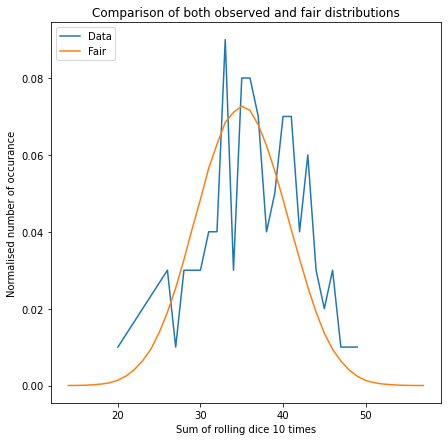

In [54]:
plt.figure(figsize=(7, 7));
plt.plot(unique, count_obs, label="Data")
plt.plot(unique2, count_fair, label="Fair")
plt.xlabel("Sum of rolling dice 10 times")
plt.ylabel("Normalised number of occurance");
plt.title('Comparison of both observed and fair distributions')
plt.legend()
plt.legend(loc=2);

In order to compare better the two distributions, we can utilise Cumulative distribution function (CDF). 

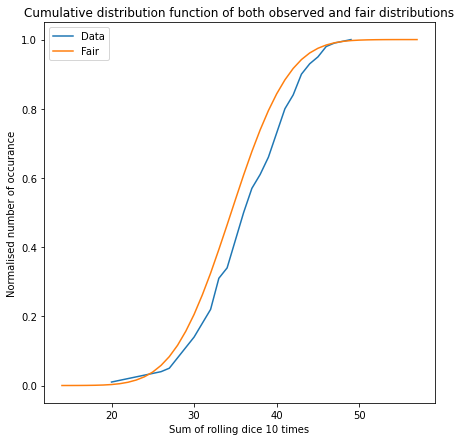

In [58]:
cdf_obs = count_obs.cumsum()
cdf_fair = count_fair.cumsum()

plt.figure(figsize=(7, 7));
plt.xlabel("Sum of rolling dice 10 times")
plt.ylabel("Normalised number of occurance");
plt.title('Cumulative distribution function of both observed and fair distributions')
plt.plot(unique, cdf_obs, label="Data")
plt.plot(unique2, cdf_fair, label="Fair")
plt.legend(loc=2);

## Anderson-Darling Test

The observed distribution can be compared with the fair one by using the Anderson-Darling Test. It consitutes a test that examines whether a given sample of data is drawn from a given probability distribution. 

In [57]:
statistic, critical_values, sig_level = anderson_ksamp([rolls_obs, rolls_fair])
print(f"AD test statistic of {statistic:.5f}, significance level of {sig_level:.9f}")
print(f"Test critical values are {critical_values}")
print("Significance level analogous to p-value, and critical values are [25%, 10%, 5%, 2.5%, 1%]")

AD test statistic of 5.38737, significance level of 0.002525583
Test critical values are [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
Significance level analogous to p-value, and critical values are [25%, 10%, 5%, 2.5%, 1%]
